In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import re
import os
import pickle
import glob
import os
import pdb
import matplotlib as mpl
import matplotlib.pyplot as plt

import torch

In [171]:
checkpoint = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

# Label noise

## large batch (1024)

In [75]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0.1-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_400-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')

In [76]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak label noise': { 'color': "C1"},
    'SGD + medium label noise': { 'color': "C2"},
    'SGD + strong label noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

Saved test_acc_label_noise_1024.pdf


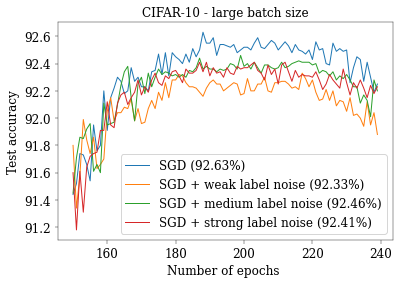

In [176]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:240], arr_data[150:240], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='lower right')

fname = "test_acc_label_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_label_noise_1024.pdf


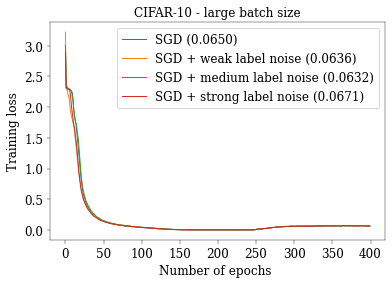

In [177]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='upper right')

fname = "train_loss_label_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_1024.pdf


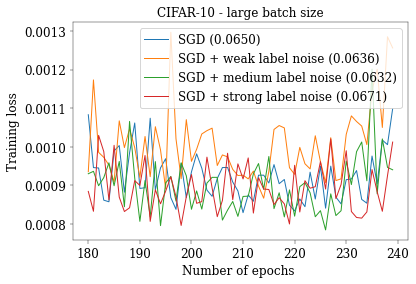

In [178]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[180:240], arr_data[180:240], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

## huge batch (4096)

In [179]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_4096.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.1-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')

In [180]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak label noise': { 'color': "C1"},
    'SGD + medium label noise': { 'color': "C2"},
    'SGD + strong label noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

Saved test_acc_label_noise_4096.pdf


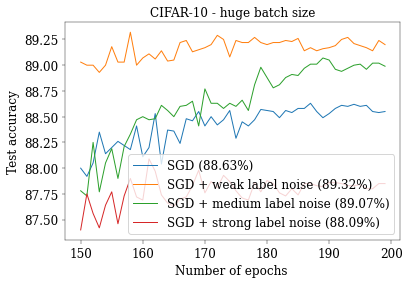

In [181]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='lower right')

fname = "test_acc_label_noise_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_label_noise_4096.pdf


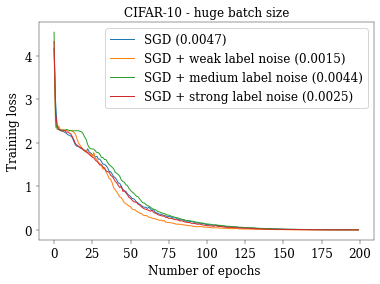

In [182]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='upper right')

fname = "train_loss_label_noise_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_4096.pdf


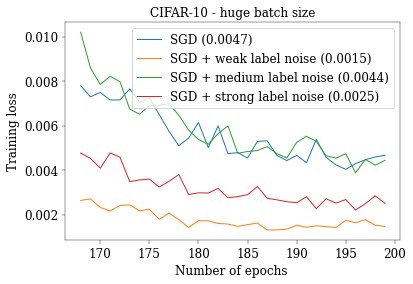

In [183]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[168:], arr_data[168:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

## batch size 128

In [184]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.1-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')

In [185]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak label noise': { 'color': "C1"},
    'SGD + medium label noise': { 'color': "C2"},
    'SGD + strong label noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium label noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

Saved test_acc_label_noise_128.pdf


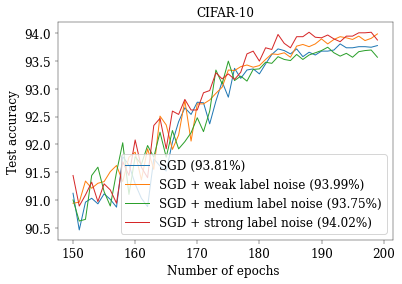

In [186]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10")
ax.legend(loc='lower right')

fname = "test_acc_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_label_noise_128.pdf


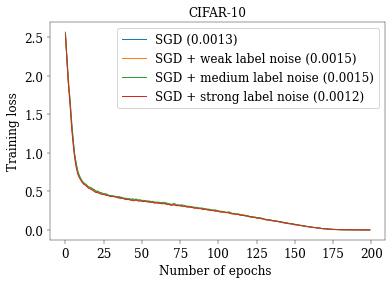

In [187]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_128.pdf


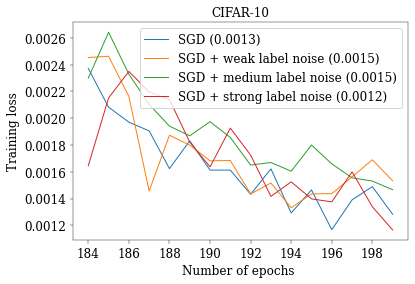

In [188]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[184:], arr_data[184:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

# Gaussian noise

## large batch (1024)

In [189]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0.02-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0.1-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0.2-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')

In [190]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak Gaussian noise': { 'color': "C1"},
    'SGD + medium Gaussian noise': { 'color': "C2"},
    'SGD + strong Gaussian noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak Gaussian noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium Gaussian noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong Gaussian noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak Gaussian noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium Gaussian noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong Gaussian noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak Gaussian noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium Gaussian noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong Gaussian noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

Saved test_acc_Gaussian_noise_1024.pdf


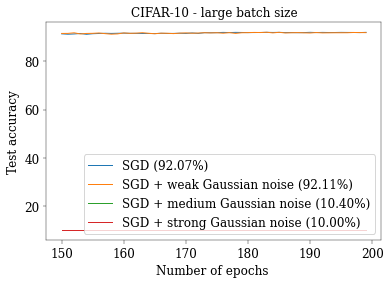

In [191]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='lower right')

fname = "test_acc_Gaussian_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_label_noise_1024.pdf


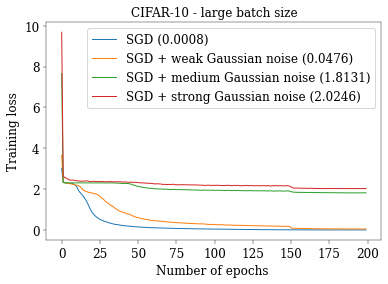

In [192]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='upper right')

fname = "train_loss_label_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_1024.pdf


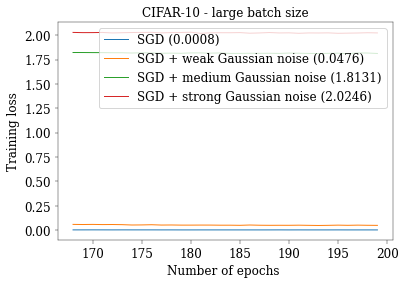

In [193]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[168:], arr_data[168:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

# Input noise

## large batch (1024)

In [194]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.02-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.1-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')

In [195]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak input noise': { 'color': "C1"},
    'SGD + medium input noise': { 'color': "C2"},
    'SGD + strong input noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

Saved test_acc_input_noise_1024.pdf


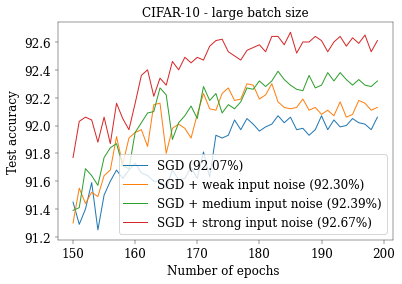

In [196]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='lower right')

fname = "test_acc_input_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_input_noise_1024.pdf


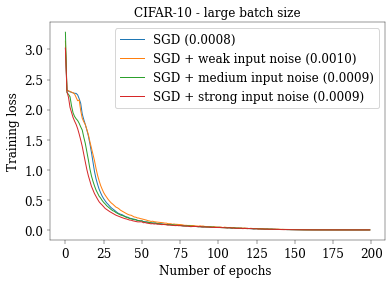

In [197]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='upper right')

fname = "train_loss_input_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_1024.pdf


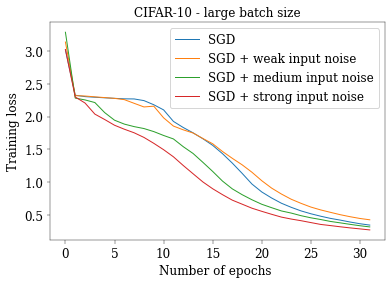

In [198]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp[0:32], arr_data[0:32], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - large batch size")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

In [199]:
## small batch (128)

In [200]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.02-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.1-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')

In [201]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak input noise': { 'color': "C1"},
    'SGD + medium input noise': { 'color': "C2"},
    'SGD + strong input noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

Saved test_acc_input_noise_128.pdf


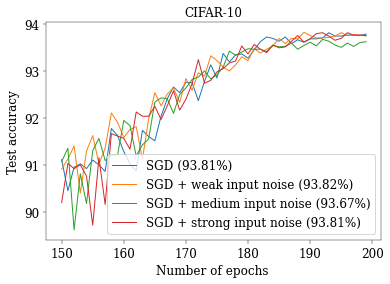

In [202]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10")
ax.legend(loc='lower right')

fname = "test_acc_input_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_input_noise_128.pdf


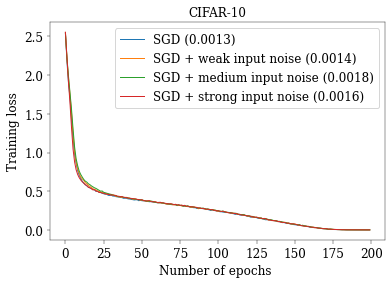

In [203]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_input_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_128.pdf


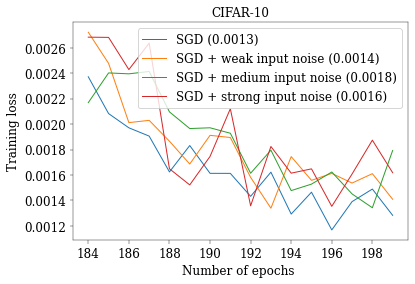

In [204]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[184:], arr_data[184:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

## huge batch (4096)

In [205]:
a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_4096.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.02-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.1-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')

In [206]:
toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak input noise:' { 'color': "C1"},
    'SGD + medium input noise': { 'color': "C2"},
    'SGD + strong input noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak input noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + medium input noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong input noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

SyntaxError: invalid syntax (<ipython-input-206-28e6302e53fe>, line 3)

In [ ]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='lower right')

fname = "test_acc_input_noise_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

In [ ]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='upper right')

fname = "train_loss_input_noise_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_label_noise_4096.pdf


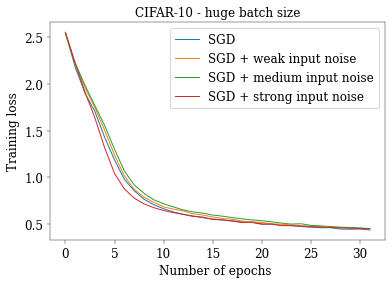

In [207]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp[0:32], arr_data[0:32], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

# all together

In [56]:
aa = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_4096.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.02-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.1-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')

e = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.1-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
f = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')
g = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_4096.pt', map_location ='cpu')

In [61]:
toplot = {
    'SGD': {'color': 'C0'},
    'GD': { 'color': "C1"},
#     'GD + weak input noise': { 'color': "C2"},
    'GD + input noise': { 'color': "C2"},
#     'GD + strong input noise': { 'color': "C4"},
    'GD + label noise': { 'color': "C3"},
#     'GD + medium label noise': { 'color': "C6"},
#     'GD + strong label noise': { 'color': "C7"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=aa['test_acc_array']
        if label == 'GD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'GD + weak input noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'GD + strong input noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            results[label]=e['test_acc_array']
        if label == 'GD + medium label noise':
          #  accuracy_da = mean
            results[label]=f['test_acc_array']
        if label == 'GD + strong label noise':
          #  accuracy_da = mean
            results[label]=g['test_acc_array']
            
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=aa['train_loss_array']
        if label == 'GD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'GD + weak input noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'GD + strong input noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            results_1[label]=e['train_loss_array']
        if label == 'GD + medium label noise':
          #  accuracy_da = mean
            results_1[label]=f['train_loss_array']
        if label == 'GD + strong label noise':
          #  accuracy_da = mean
            results_1[label]=g['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=aa['best_acc']
        if label == 'GD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'GD + weak input noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'GD + strong input noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            accuracy[label]=e['best_acc']
        if label == 'GD + medium label noise':
          #  accuracy_da = mean
            accuracy[label]=f['best_acc']
        if label == 'GD + strong label noise':
          #  accuracy_da = mean
            accuracy[label]=g['best_acc']



Saved final_4096_test_acc.pdf


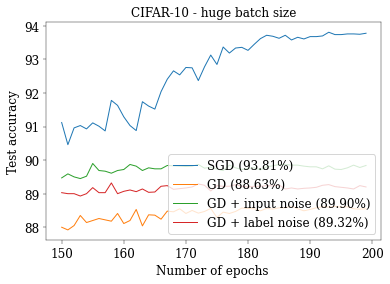

In [74]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10 - huge batch size")
ax.legend(loc='lower right')

fname = "final_4096_test_acc.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved final_4096_train_loss.pdf


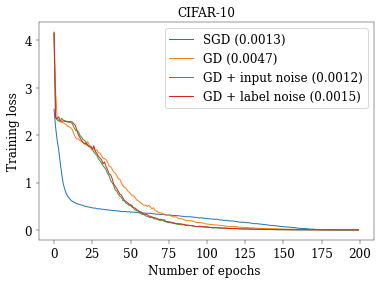

In [67]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "final_4096_train_loss.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved test_acc_bis_final_4096.pdf


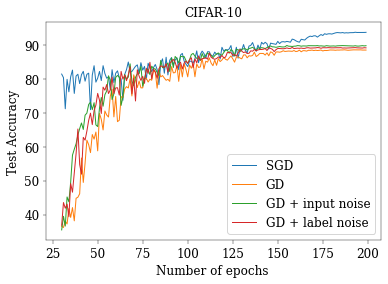

In [73]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp[30:], arr_data[30:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test Accuracy')
ax.set_title("CIFAR-10")
ax.legend(loc='lower right')

fname = "test_acc_bis_final_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_final_4096.pdf


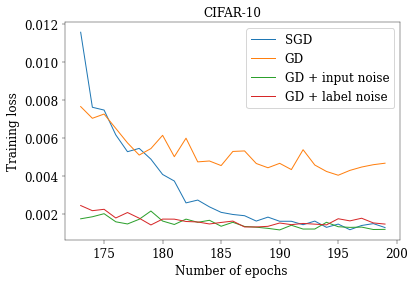

In [72]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp[173:], arr_data[173:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_bis_final_4096.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

# all together small batch

In [96]:
aa = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')

a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_1024.pt', map_location ='cpu')

b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.02-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.1-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.2-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')

e = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.1-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
f = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.2-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')
g = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_1024.pt', map_location ='cpu')

In [97]:
toplot = {
    'SGD': {'color': 'C0'},
    'GD': { 'color': "C1"},
#     'GD + weak input noise': { 'color': "C2"},
#     'GD + medium input noise': { 'color': "C3"},
    'GD + input noise': { 'color': "C2"},
#     'GD + weak label noise': { 'color': "C5"},
#     'GD + medium label noise': { 'color': "C6"},
    'GD + label noise': { 'color': "C3"},
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=aa['test_acc_array']
        if label == 'GD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'GD + weak input noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'GD + medium input noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
        if label == 'GD + weak label noise':
          #  accuracy_da = mean
            results[label]=e['test_acc_array']
        if label == 'GD + medium label noise':
          #  accuracy_da = mean
            results[label]=f['test_acc_array']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            results[label]=g['test_acc_array']
            
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=aa['train_loss_array']
        if label == 'GD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'GD + weak input noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'GD + medium input noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
        if label == 'GD + weak label noise':
          #  accuracy_da = mean
            results_1[label]=e['train_loss_array']
        if label == 'GD + medium label noise':
          #  accuracy_da = mean
            results_1[label]=f['train_loss_array']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            results_1[label]=g['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=aa['best_acc']
        if label == 'GD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'GD + weak input noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'GD + medium input noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'GD + input noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']
        if label == 'GD + weak label noise':
          #  accuracy_da = mean
            accuracy[label]=e['best_acc']
        if label == 'GD + medium label noise':
          #  accuracy_da = mean
            accuracy[label]=f['best_acc']
        if label == 'GD + label noise':
          #  accuracy_da = mean
            accuracy[label]=g['best_acc']



Saved final_1024_test_acc.pdf


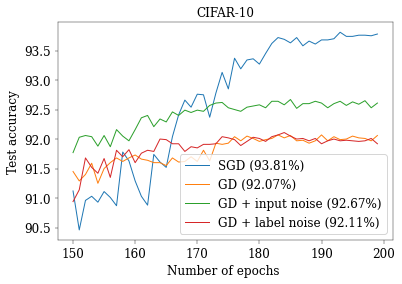

In [98]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[150:], arr_data[150:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10")
ax.legend(loc='lower right')

fname = "final_1024_test_acc.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved final_1024_train_loss.pdf


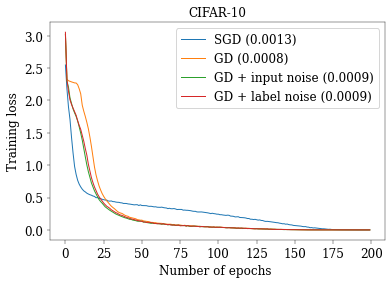

In [102]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)

# plt.yscale('log')
ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "final_1024_train_loss.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved test_acc_bis_final_1024.pdf


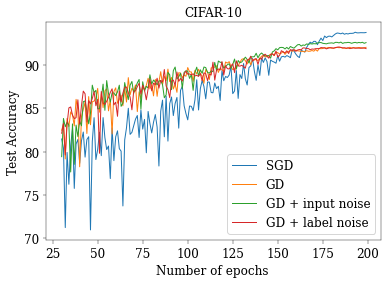

In [100]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp[30:], arr_data[30:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test Accuracy')
ax.set_title("CIFAR-10")
ax.legend(loc='lower right')

fname = "test_acc_bis_final_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

Saved train_loss_bis_final_1024.pdf


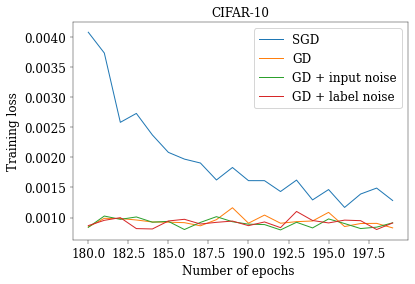

In [101]:
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl}"
    ax.plot(xp[180:], arr_data[180:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_bis_final_1024.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

In [51]:
g['train_loss_array']

array([3.05410082e+00, 2.31547434e+00, 2.14238934e+00, 2.00918088e+00,
       1.93750997e+00, 1.88090282e+00, 1.82450178e+00, 1.77083433e+00,
       1.68801444e+00, 1.61560555e+00, 1.55339373e+00, 1.45992915e+00,
       1.37078033e+00, 1.25787934e+00, 1.15622812e+00, 1.01602695e+00,
       9.11430629e-01, 8.07738687e-01, 7.31552381e-01, 6.64690973e-01,
       6.09585252e-01, 5.54834794e-01, 5.13297704e-01, 4.80357072e-01,
       4.46188270e-01, 4.15387393e-01, 3.90403906e-01, 3.66293920e-01,
       3.51416700e-01, 3.33958469e-01, 3.12495857e-01, 2.97511607e-01,
       2.82521491e-01, 2.67087599e-01, 2.58075895e-01, 2.42137014e-01,
       2.30752199e-01, 2.24911688e-01, 2.14624895e-01, 2.03715300e-01,
       1.92046671e-01, 1.88536649e-01, 1.78204341e-01, 1.71012249e-01,
       1.65077462e-01, 1.59201063e-01, 1.53636917e-01, 1.46638579e-01,
       1.42447368e-01, 1.36409406e-01, 1.33178350e-01, 1.27315100e-01,
       1.20124835e-01, 1.17477412e-01, 1.17944140e-01, 1.17891752e-01,
      

In [77]:
# plot for paper

Saved test_acc_label_noise_128.pdf
Saved train_loss_label_noise_128.pdf
Saved train_loss_bis_label_noise_128.pdf


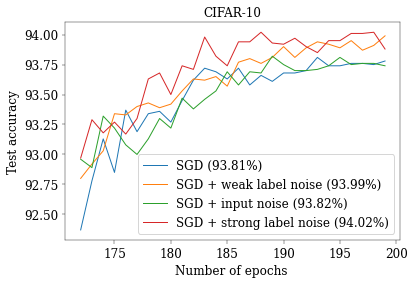

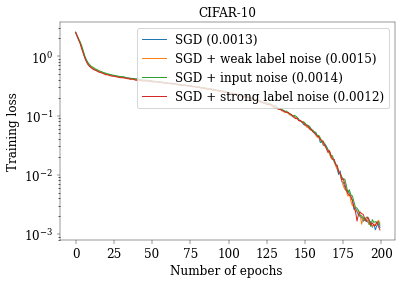

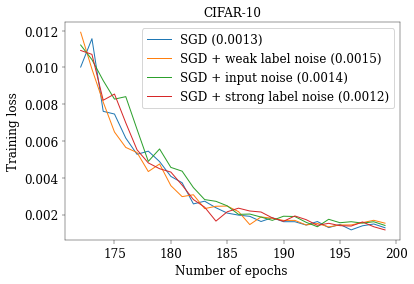

In [94]:
## batch size 128

a = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_fixed-batch_size_128.pt', map_location ='cpu')
b = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.1-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')
c = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0-input_gaussian_noise_0.02-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')
d = torch.load('tiger_files/pb29/checkpoint/final/FINAL_dataset_cifar10-model_vgg-epoch_200-label_noise_prob_0.5-input_gaussian_noise_0-gaussian_noise_SD_0-noise_decay_decay-batch_size_128.pt', map_location ='cpu')

toplot = {
    'SGD': {'color': 'C0'},
    'SGD + weak label noise': { 'color': "C1"},
    'SGD + input noise': { 'color': "C2"},
    'SGD + strong label noise': { 'color': "C3"}
}
 
results = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results[label]=a['test_acc_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results[label]=b['test_acc_array']
        if label == 'SGD + input noise':
          #  accuracy_da = mean
            results[label]=c['test_acc_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results[label]=d['test_acc_array']
            
results_1 = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            results_1[label]=a['train_loss_array']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            results_1[label]=b['train_loss_array']
        if label == 'SGD + input noise':
          #  accuracy_da = mean
            results_1[label]=c['train_loss_array']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            results_1[label]=d['train_loss_array']
            
accuracy = {}

for label, fields in toplot.items():
        if label == 'SGD':
           # accuracy_adam = mean_ad
            accuracy[label]=a['best_acc']
        if label == 'SGD + weak label noise':
          #  accuracy_da = mean
            accuracy[label]=b['best_acc']
        if label == 'SGD + input noise':
          #  accuracy_da = mean
            accuracy[label]=c['best_acc']
        if label == 'SGD + strong label noise':
          #  accuracy_da = mean
            accuracy[label]=d['best_acc']

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({accuracy[lbl]:2.2f}%)"
    ax.plot(xp[172:], arr_data[172:], label=label)


ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Test accuracy')
ax.set_title("CIFAR-10")
ax.legend(loc='lower right')

fname = "test_acc_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp, arr_data, label=label)


plt.yscale('log')
ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")

mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12
linewidth = '0.4'
mpl.rcParams['lines.linewidth'] = 1
mpl.rcParams['axes.linewidth'] = linewidth
mpl.rcParams['xtick.major.width'] = linewidth
mpl.rcParams['ytick.major.width'] = linewidth

fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)
for res1 in results_1.items():
    lbl = res1[0]
    arr_data = res1[1]#[0]
    xp = np.array(range(len(arr_data)))
    fields = toplot[lbl]
    label = f"{lbl} ({arr_data[-1]:2.4f})"
    ax.plot(xp[172:], arr_data[172:], label=label)

ax.set_xlabel('Number of epochs ')
ax.set_ylabel('Training loss')
ax.set_title("CIFAR-10")
ax.legend(loc='upper right')

fname = "train_loss_bis_label_noise_128.pdf"
plt.savefig(fname)
print(f"Saved {fname}")